In [1]:
import sidechainnet as scn
from sidechainnet.dataloaders.SCNProtein import SCNProtein
import numpy as np
nan = np.nan
import torch
np.set_printoptions(suppress=True)
torch.set_printoptions(threshold=10_000)
torch.set_printoptions(profile="full")
from sidechainnet.structure.fastbuild import AA2NUM
from sidechainnet.tests.test_fastbuild import alphabet_protein
import seaborn as sns
from sidechainnet.research.build_parameter_optim.optimize_build_params import BuildParamOptimizer

# Part 2

In [6]:
p = alphabet_protein()
p2 = alphabet_protein()
bpo = BuildParamOptimizer(p,
                          opt_bond_lengths=True,
                          opt_thetas=True,
                          opt_chis=True,
                          )
p.to_3Dmol()

Removing <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x7f89f8ae7f00> >.


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [7]:
p.to_pdb("/home/jok120/Downloads/min_alfa00.pdb")

In [8]:
p.get_energy()

Quantity(value=46950045.55039975, unit=kilojoule/mole)

In [14]:
_ = bpo.optimize(opt='SGD', lr=1e-6, steps=10000)

100%|███████████████████████████████████████████████████████████████████| 10000/10000 [07:12<00:00, 23.12it/s, loss=-22.19]


<AxesSubplot:>

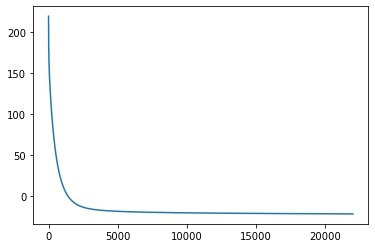

In [16]:
import matplotlib.pyplot as plt
start = 0
sns.lineplot(x=list(range(len(bpo.losses[start:]))), y=bpo.losses[start:])
# plt.ylim(0, 1000)

In [17]:
p.fastbuild(add_hydrogens=True, build_params=bpo.build_params, inplace=True)

In [18]:
p.get_energy()

Quantity(value=-22.187141204189743, unit=kilojoule/mole)

In [19]:
p.to_pdb("/home/jok120/Downloads/min_alfa08.pdb")

In [ ]:
p3 = alphabet_protein()
p3.fastbuild(add_hydrogens=True, build_params=None, inplace=True)

In [ ]:
p.to_3Dmol(other_protein=p3)

In [ ]:
bpo.build_params

In [21]:
import pickle

In [22]:
with open("/home/jok120/sidechainnet/sidechainnet/resources/build_params.pkl", "wb") as f:
    pickle.dump(bpo.build_params, f)

In [ ]:
!ls -hlt /home/jok120/sidechainnet/sidechainnet/research/build_parameter_optim/

In [ ]:
with open("/home/jok120/sidechainnet/sidechainnet/research/build_parameter_optim/build_params.pkl", "rb") as f:
    bp2 = pickle.load(f)

In [ ]:
bp2

# Try small protein

In [ ]:
from sidechainnet.tests.test_fastbuild import get_p
p = get_p()
p2 = get_p()
bpo = BuildParamOptimizer(p,
                          opt_bond_lengths=True,
                          opt_thetas=True,
                          opt_chis=True,
                          )
p.to_3Dmol()

In [ ]:
p.to_pdb("/home/jok120/Downloads/min_p00.pdb")

In [ ]:
p.get_energy()

In [ ]:
_ = bpo.optimize(opt='SGD', lr=1e-6, steps=1000)

In [ ]:
import matplotlib.pyplot as plt
start = 0
sns.lineplot(x=list(range(len(bpo.losses[start:]))), y=bpo.losses[start:])
# plt.ylim(0, 1000)

In [ ]:
p.fastbuild(add_hydrogens=True, build_params=bpo.build_params, inplace=True)

In [ ]:
p.get_energy()

In [ ]:
p.to_pdb("/home/jok120/Downloads/min_p01.pdb")

In [ ]:
p3 = get_p()
p3.fastbuild(add_hydrogens=True, build_params=None, inplace=True)

In [ ]:
p.to_3Dmol(other_protein=p3)

In [ ]:
AA2NUM["L"]

In [ ]:
bpo.build_params['CA'].keys()

In [ ]:
for key in bpo.build_params['CA'].keys():
    print(key)
    print(bpo.build_params['CA'][key][9])

# LBFGS

In [ ]:
dp = alphabet_protein()
bpo = BuildParamOptimizer(p)

In [ ]:
p2 = alphabet_protein()

In [ ]:
p.to_3Dmol()

In [ ]:
bpo.optimize(opt='LBFGS', steps=50)

In [ ]:
sns.lineplot(x=list(range(len(bpo.losses))), y=bpo.losses)

In [ ]:
p.fastbuild(add_hydrogens=True, build_params=bpo.build_params, inplace=True)

In [ ]:
p3 = alphabet_protein()
p3.fastbuild(add_hydrogens=True, build_params=None, inplace=True)

In [ ]:
p.to_3Dmol(other_protein=p3)

# Part 1

In [ ]:
p2 = scn.load_pdb("/home/jok120/Downloads/alfa_af2_pred.pdb")
p2.torch()

In [ ]:
# p = alphabet_protein()
p = p2

In [ ]:
p.coords.shape

In [ ]:
p.get_atom_names(zip_coords=True, pprint=True)

In [ ]:
p.to_3Dmol()

In [ ]:
c = p.fastbuild(inplace=True)

In [ ]:
c.shape

In [ ]:
p.has_hydrogens

In [ ]:
p.to_3Dmol()

In [ ]:
p.fastbuild(add_hydrogens=True, inplace=True)

In [ ]:
p.hcoords.shape

In [ ]:
p.to_3Dmol()

In [ ]:
p.hcoords.shape, p.coords.shape

In [ ]:
p.to_pdb("/home/jok120/Downloads/build_alfa03.pdb")

In [ ]:
# Load the protein created by alphafold
p2 = scn.load_pdb("/home/jok120/Downloads/alfa_af2_pred.pdb")
p2.torch()

In [ ]:
p2.coords[0]

In [ ]:
p2.get_atom_names(True, True)

In [ ]:
p2.seq

In [ ]:
p2.to_3Dmol()

In [ ]:
p2.coords.shape

In [ ]:
torch.tensor(p2.angles)

In [ ]:
d = scn.load("debug", with_pytorch='dataloaders', dynamic_batching=False)

In [ ]:
d.keys()

In [ ]:
batch = next(iter(d['train']))

In [ ]:
batch.

In [ ]:
(batch.seqs[4] == 0).all(dim=-1)

In [ ]:
max((max(llist) for llist in [d[split].dataset.lengths for split in d.keys()]))

In [ ]:
hcoords = p.fastbuild(add_hydrogens=True)
p.coords = hcoords
p.hcoords = hcoords
p.has_hydrogens=True
p.to_3Dmol()

# Simple energy minimization

In [ ]:
p.get_energy()

In [ ]:
p.get_atom_names(pprint=True)

In [ ]:
p.get_forces(pprint=True)

In [ ]:
p.to_3Dmol()

In [ ]:
p.minimize()

In [ ]:
p.write_ending_positions_to_pdbfile("/home/jok120/Downloads/predhmin02.pdb")

In [ ]:
p._hcoords_for_openmm

# Trying to optimize hand-written parameters

In [ ]:
p.system.getForces()

In [ ]:
p.minimize(nonbonded_interactions=False)

In [ ]:
p.write_ending_positions_to_pdbfile("/home/jok120/Downloads/predhmin03.pdb")

In [ ]:
p.